In [2]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json

from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  del sys.path[0]


In [3]:
def plot_column(df, column):
    df['name'] = df.apply(lambda r: str(r['arch']) + ' ' + str(r['version']),axis=1)
    trained_on = df.trained_on.unique()
    fig, axes = plt.subplots(ncols=3, sharey=True,figsize=(15,7))
    for idx, trainset in enumerate(trained_on):
        query = f'trained_on == "{trainset}"'
        axes[idx].set_title(query)
        
        df.query(query).pivot(index='tested_on', columns='name', values=column).plot.bar(ax=axes[idx]).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

    fig.tight_layout()
    plt.show()
    

# Trained on TPCH

In [7]:
os.getcwd()

'/Users/danieldubovski/projects/deep_query_optimization/dqo/estimator'

In [45]:
stratified, bucketed = pd.read_csv('stratified_gen_model_types_best.csv'), pd.read_csv('gen_model_types_best.csv')

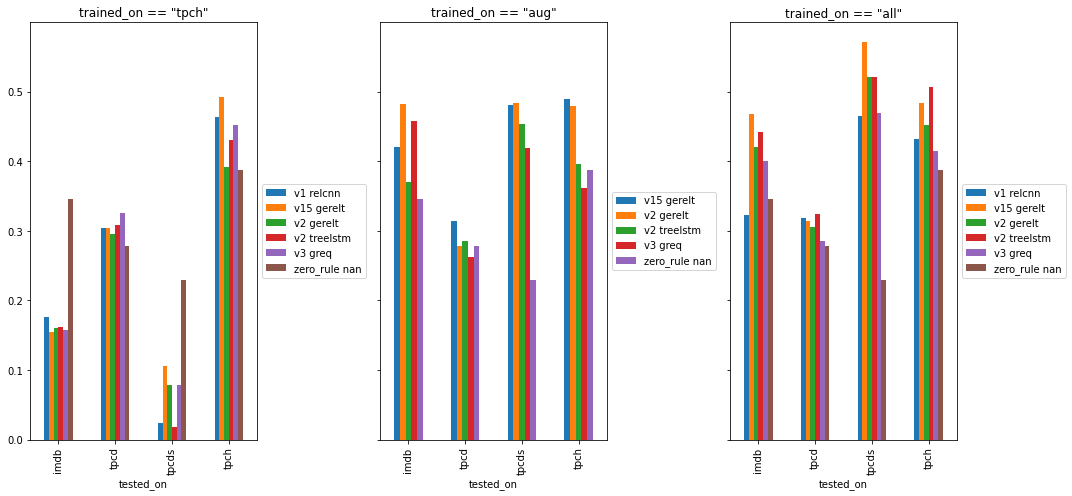

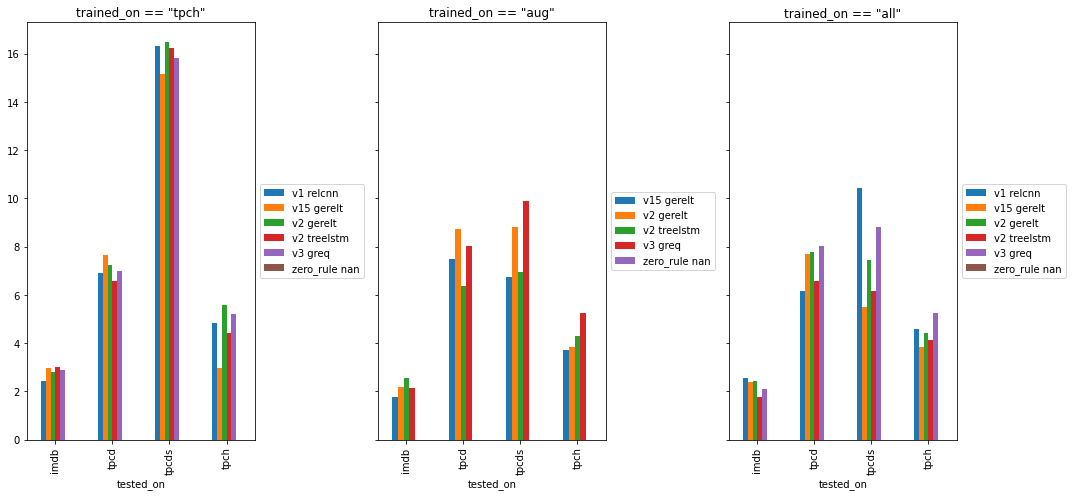

(None, None)

In [43]:
plot_column(stratified, 'accuracy'),plot_column(stratified, 'mae'),

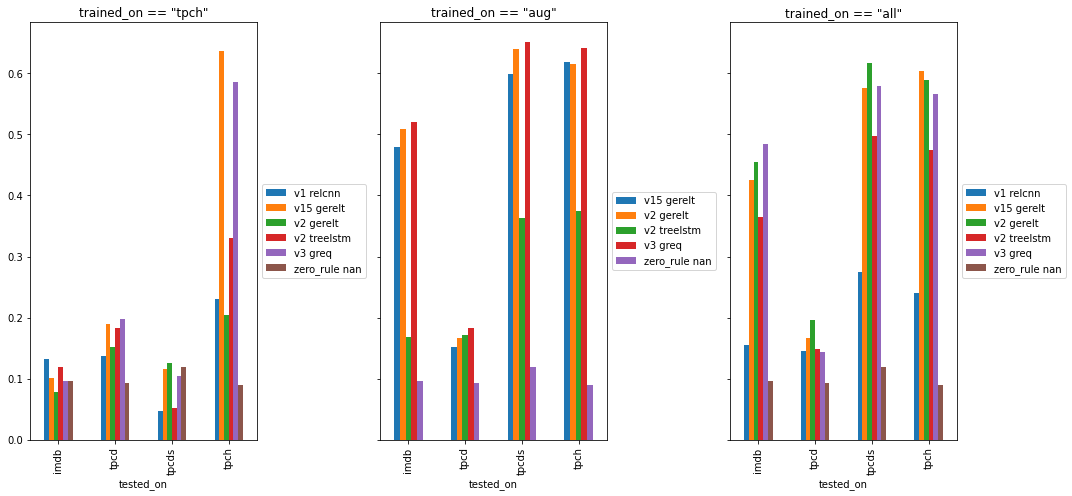

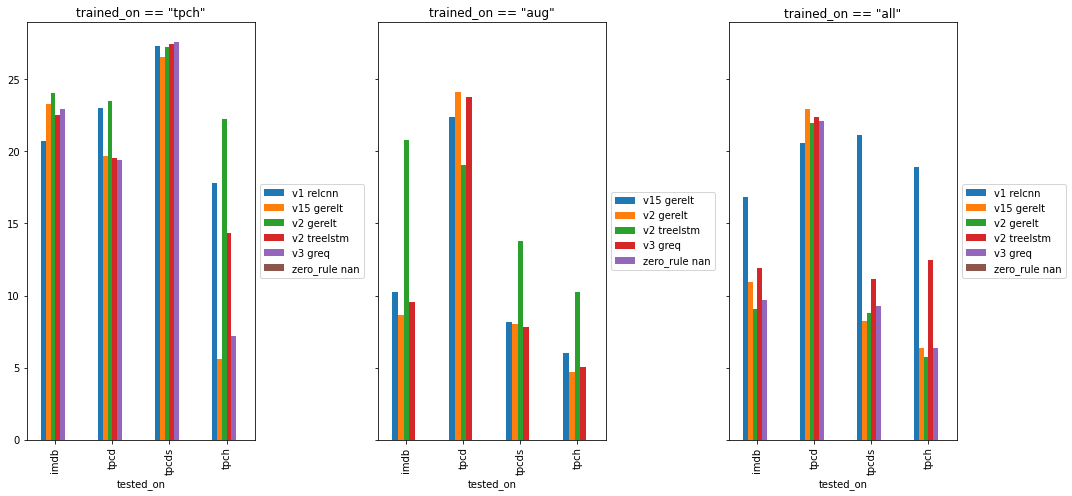

(None, None)

In [46]:
plot_column(bucketed, 'accuracy'),plot_column(bucketed, 'mae'),

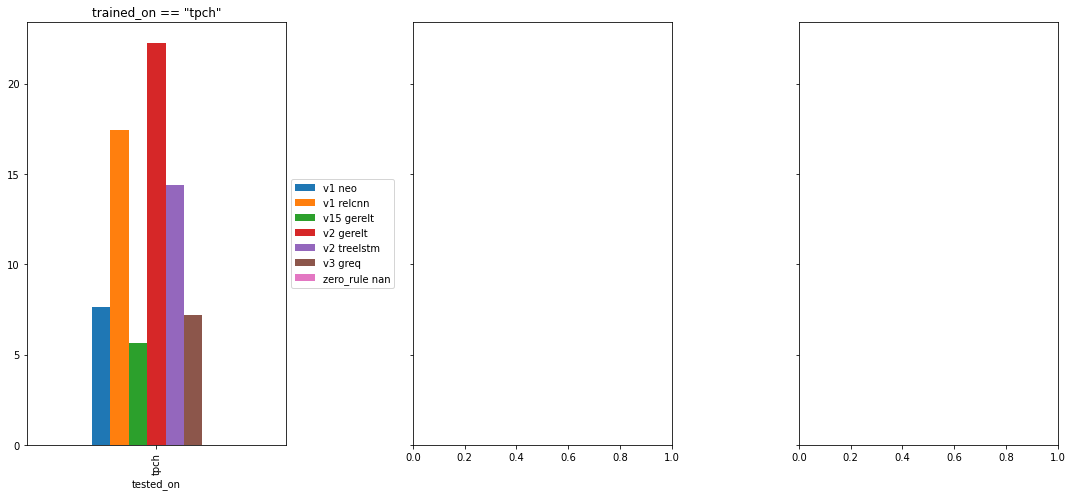

In [143]:
plot_column(bucketed, 'mae') # lower is better

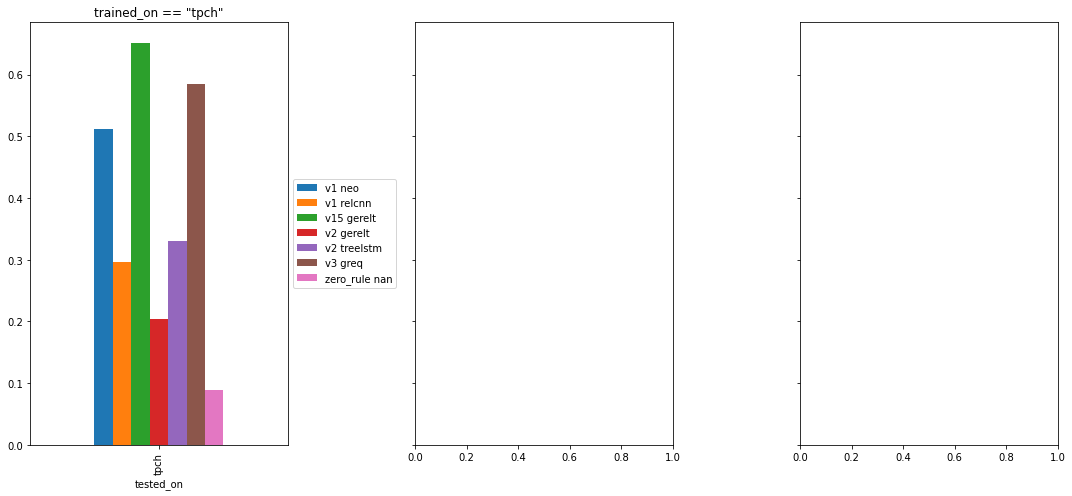

In [144]:
plot_column(bucketed, 'accuracy') #higher is better

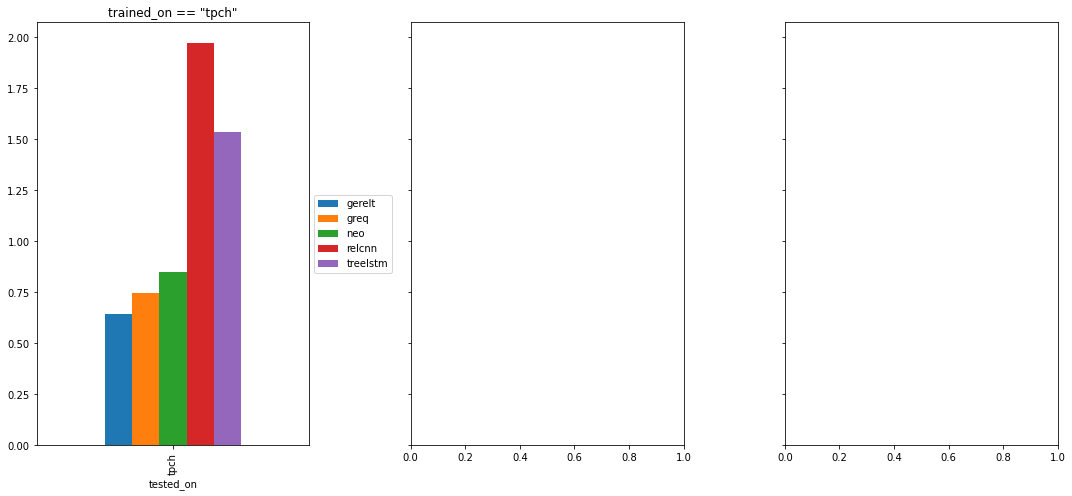

In [20]:
plot_column(bucketed, 'mae') #higher is better

# generlize

In [28]:
stratified, bucketed = pd.read_csv('stratified_gen_model_types_best.csv'), pd.read_csv('gen_model_types_best.csv')

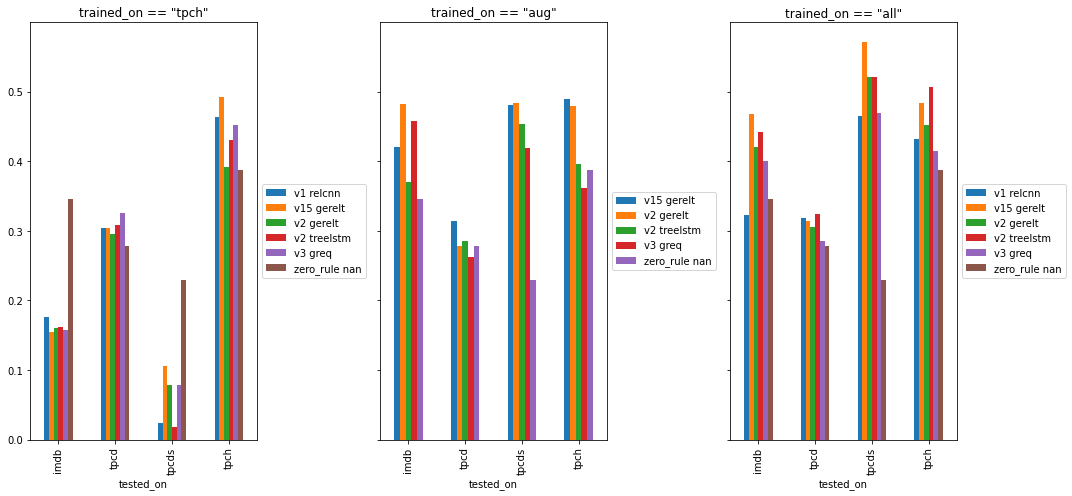

In [29]:
plot_column(stratified, 'accuracy') #higher is better

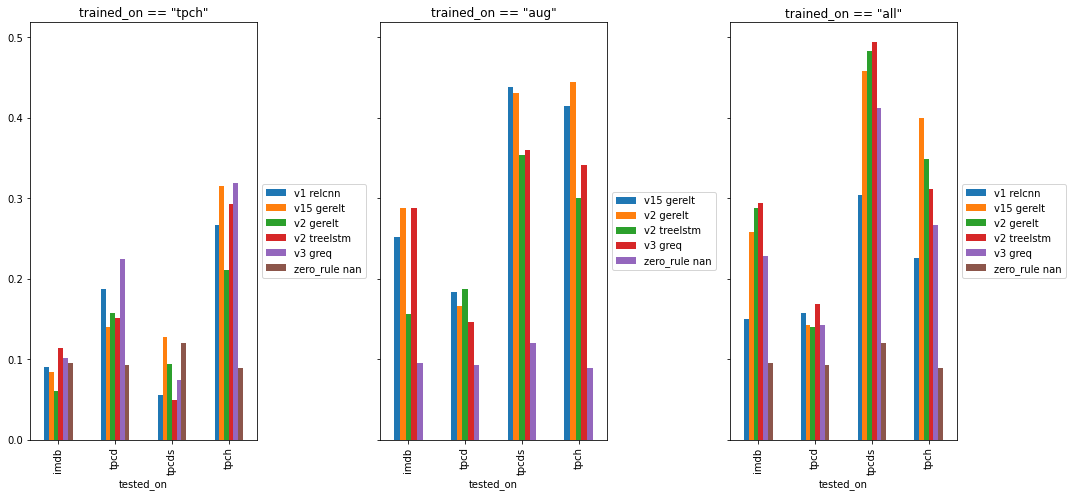

In [30]:
plot_column(bucketed, 'accuracy') #higher is better

In [10]:
bucketed.groupby('name').agg('mean')

,epoch,accuracy,balanced accuracy,recall,f1 weighted,mae
name,,,,,,
v1 relcnn,10.000000,0.170365,0.074272,0.149882,0.122546,20.787714
v15 gerelt,79.000000,0.388618,0.307627,0.363832,0.371383,14.198019
v2 gerelt,39.333333,0.362043,0.282938,0.337397,0.342275,15.672988
v2 treelstm,31.333333,0.270566,0.181323,0.247549,0.244494,17.150277
v3 greq,95.666667,0.396042,0.318110,0.373450,0.380574,14.237338
zero_rule nan,NaN,0.099372,0.000000,0.000000,0.000000,0.000000


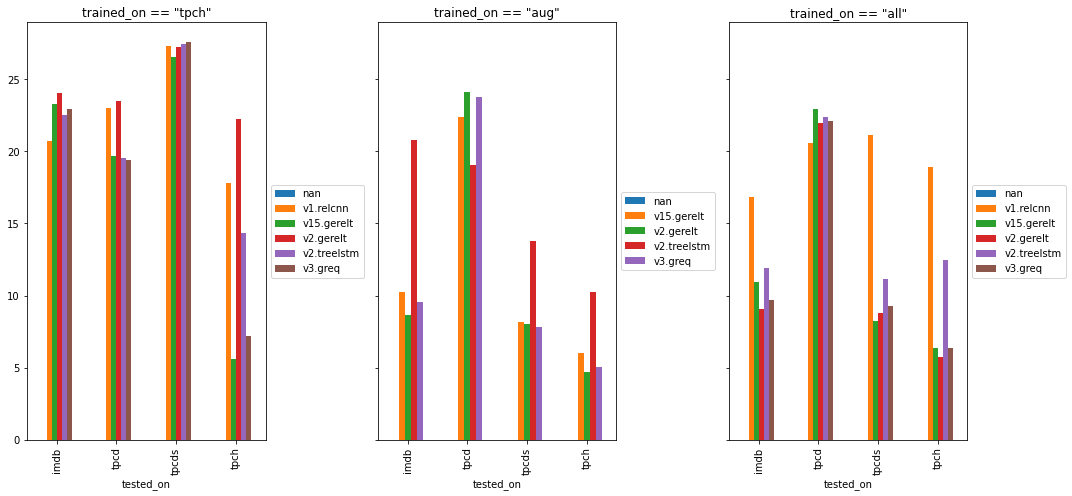

In [104]:
plot_column(bucketed, 'mae') #higher is better

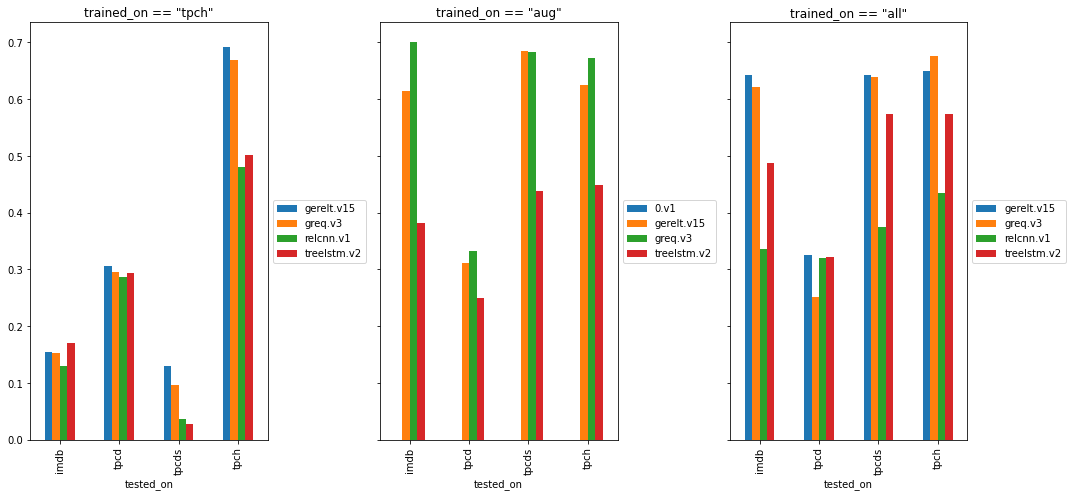

In [105]:
plot_column(stratified, 'accuracy') #higher is better

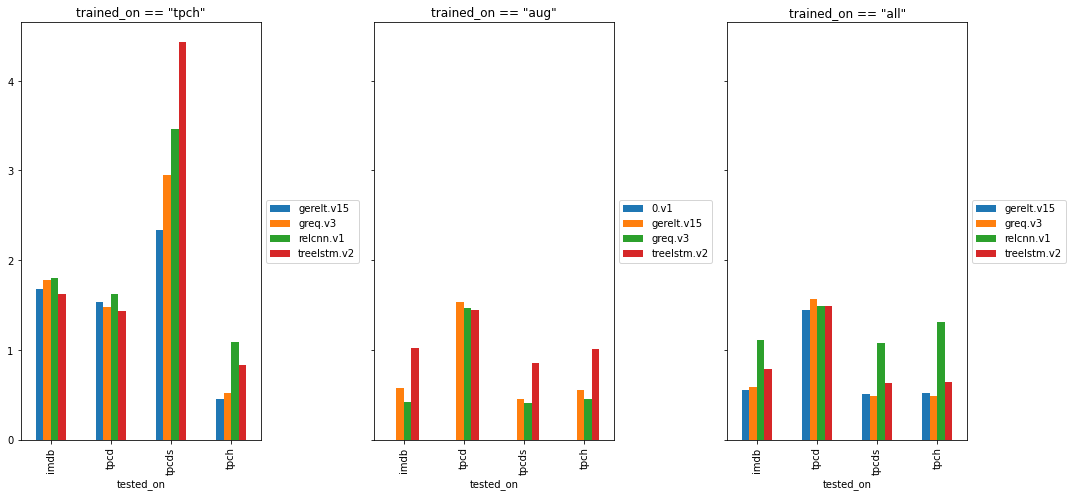

In [106]:
plot_column(stratified, 'mae') #higher is better

---
# BEST

## TPCH

In [79]:
best_gen = pd.read_csv('gen_model_types_best.csv') 
best_tpch = pd.read_csv('model_types_tpch_best.csv')

In [124]:
bucketed.groupby(['trained_on', 'version','arch'])[['accuracy','mae']].aggregate('mean')

accuracy        mae
trained_on version  arch                     
tpch       gerelt   v15   0.651852   5.662031
                    v2    0.203704  22.280084
           greq     v3    0.585185   7.182833
           neo      v1    0.511111   7.643359
           relcnn   v1    0.296296  17.439540
           treelstm v2    0.329630  14.370018

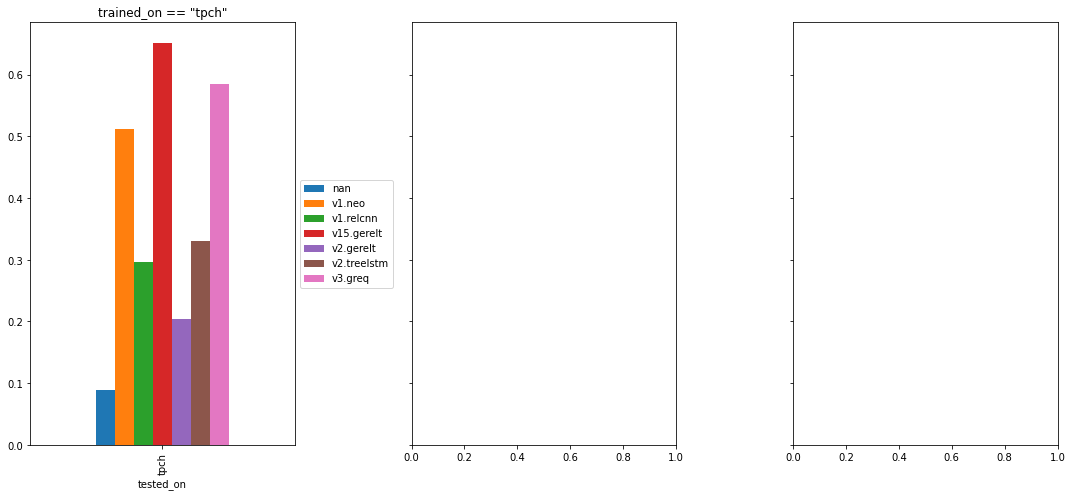

In [77]:
plot_column(best_tpch, 'accuracy') #higher is better

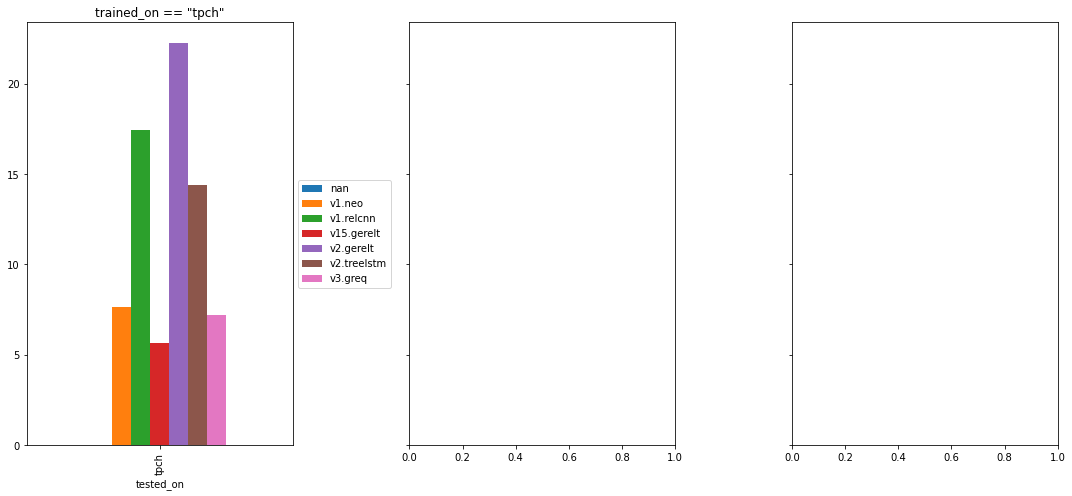

In [78]:
plot_column(best_tpch, 'mae') #higher is better

# All

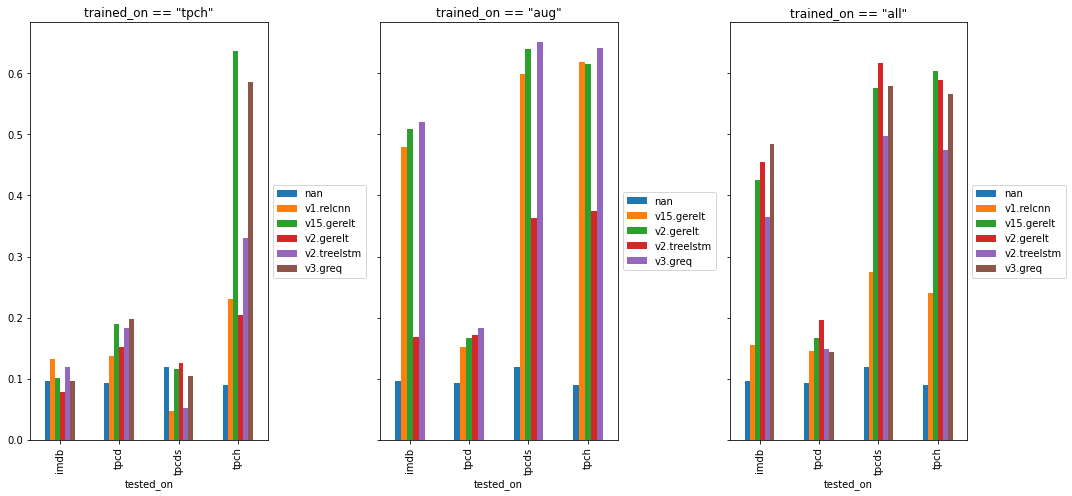

In [81]:
plot_column(best_gen, 'accuracy') #higher is better

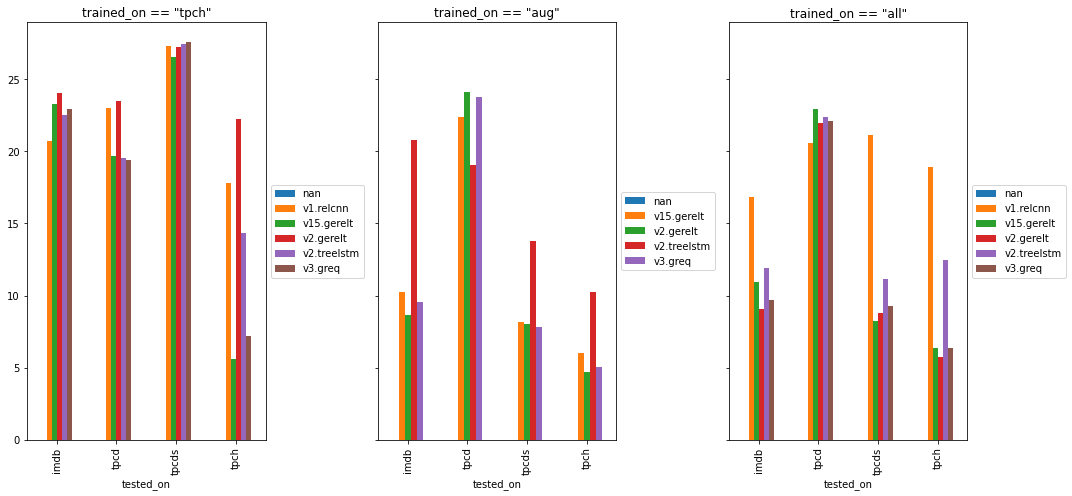

In [82]:
plot_column(best_gen, 'mae') #higher is better

In [35]:
vs = pd.read_csv('15vs21.csv')

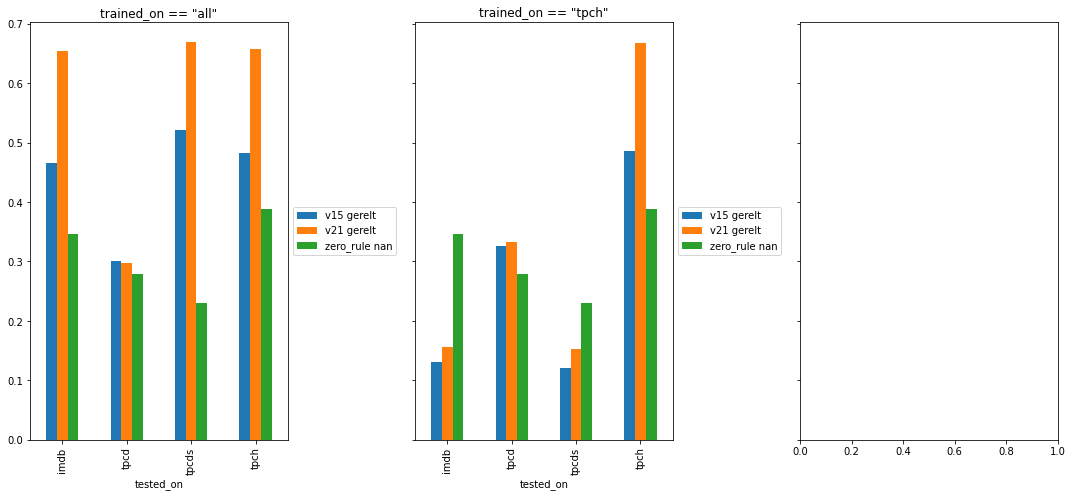

In [36]:
plot_column(vs, 'accuracy') #higher is better